In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Conv2D ,Dropout ,Dense, BatchNormalization, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,Y_train) , (x_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
number_of_classes = len(set(Y_test))


In [5]:
number_of_classes

10

In [6]:
x_train.max()

255

In [7]:
x_train.min()

0

In [8]:
x_train,x_test = x_train/255.0 ,x_test/255.0

In [9]:
x_train.max()

1.0

In [10]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
from keras.api._v2.keras import optimizers
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), padding = "same", activation = "relu")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding = "same", activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), padding = "same", activation = "relu")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = "same", activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), padding = "same", activation = "relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = "same", activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.3)(x)
x = Dense(number_of_classes, activation = "softmax")(x)
model = Model(inputs = i , outputs = x)


In [12]:
model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [17]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rotation_range=180)
train_generator = data_generator.flow(x_train, Y_train, batch_size=32)

r = model.fit_generator(train_generator, validation_data=(x_test,Y_test),epochs = 20 , steps_per_epoch= x_train.shape[0] // 32 )


Epoch 1/20
   5/1875 [..............................] - ETA: 27s - loss: 0.2933 - accuracy: 0.9000

<ipython-input-17-2e01c3ef12a7>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test,Y_test),epochs = 20 , steps_per_epoch= x_train.shape[0] // 32 )


1875/1875 [==============================] - 32s 17ms/step - loss: 0.3528 - accuracy: 0.8732 - val_loss: 0.3124 - val_accuracy: 0.8877
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3530 - accuracy: 0.8731 - val_loss: 0.3118 - val_accuracy: 0.8881
Epoch 3/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3488 - accuracy: 0.8737 - val_loss: 0.3310 - val_accuracy: 0.8827
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3447 - accuracy: 0.8759 - val_loss: 0.3203 - val_accuracy: 0.8850
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3404 - accuracy: 0.8771 - val_loss: 0.3088 - val_accuracy: 0.8861
Epoch 6/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3352 - accuracy: 0.8799 - val_loss: 0.3763 - val_accuracy: 0.8614
Epoch 7/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3364 - accuracy: 0.8784 - val_loss: 0.3362 - val_accura

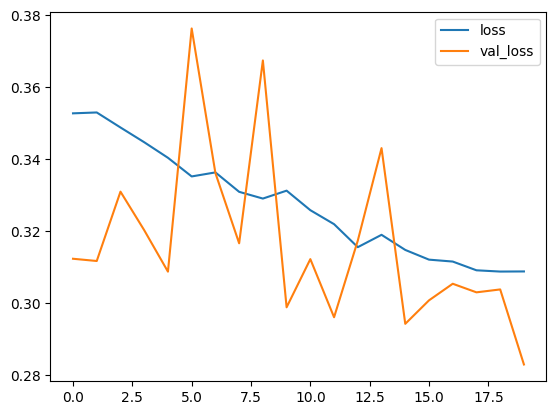

In [21]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

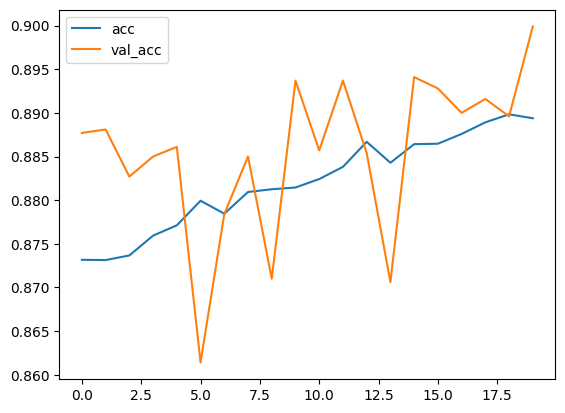

In [22]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

In [25]:
y_pred = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 2s 4ms/step


In [28]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

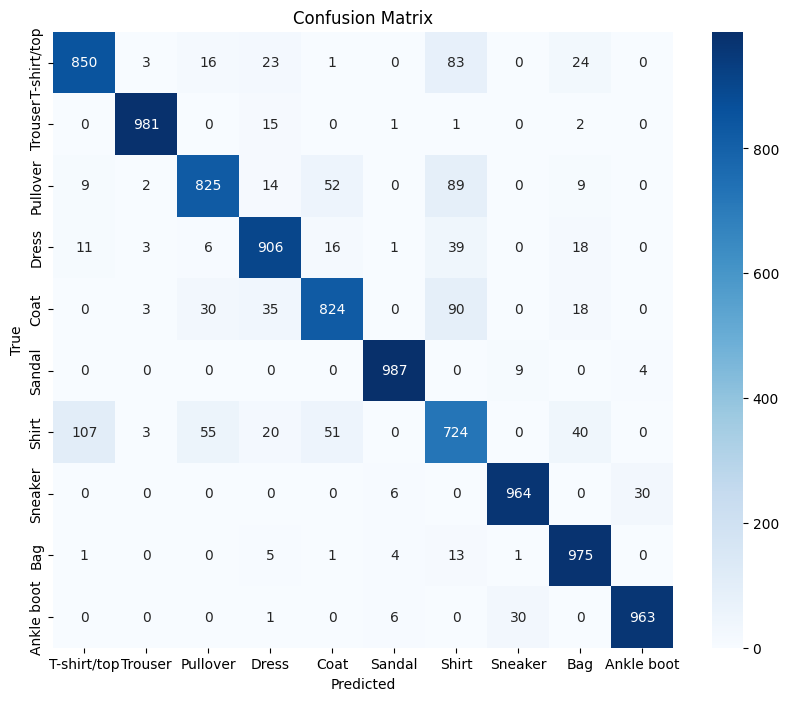

In [65]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",  "Ankle boot"]

confusion = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Wrong prediction. Predicted label: T-shirt/top True label: Shirt')

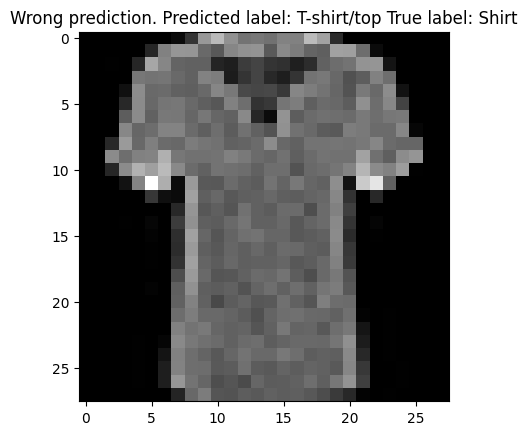

In [67]:
false_idx = np.where(Y_test!=y_pred)[0]
idx = np.random.choice(false_idx)
plt.imshow(x_test[idx], cmap = "gray")
plt.title("Wrong prediction. Predicted label: " + class_labels[y_pred[idx]] + " True label: " + class_labels[Y_test[idx]])

